<h1 style="font-family:verdana;"> <center>💠Indian Politics Tweets EDA and Sentiment Analysis</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">Thanks for visiting my notebook </center></p>

***

<center><img src='https://media2.giphy.com/media/LkwOlsrAxH11Y2cdOX/200w.webp?cid=ecf05e47y19ommgd9ib0vellavsa7sxf9j8tiegv65qjqbiy&rid=200w.webp&ct=s' 
     height=30px width=160px /></center>
     
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 Please feel free to fork or edit the notebook for your convenience. If you enjoyed the notebook, kindly consider upvoting it as it helps others discover it too.Your support inspires me to continue working on similar projects.Thank you!.😊
</div>    


# 📋Table of Contents
* [Installing Necessary Libraries](#section-one)
* [Importing Necessary Libraries](#section-two)
* [Loading the Dataset](#section-three)
* [Dataset Checking to perform](#section-four)
* [Data Preprocessing](#section-five)
* [Sentiment Analysis](#section-six)
* [Data Visualization](#section-seven)
    * [Sentiment Distribution](#sub-one)
    * [Countplot of Sentiment of the data](#sub-two)
    * [Time of the Day most Tweeted](#sub-three)
    * [Time of Day Tweeted total no. of positive tweet, total no. of negative tweet, total no. of neutral tweet](#sub-four)
    * [Hourly Number of Tweets by Sentiment](#sub-five)
    * [Wordcloud of Sentiments](#sub-six)

<a id="section-one"></a>
# 🛠️Installing Necessary Libraries

In [1]:
!pip install better-profanity
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.0 MB/s eta 0:00:00


<a id="section-two"></a>
# 🧰Importing Necessary Libraries

**Here are the Short Description of using libraries:**
* **re :**  The re library in Python is used for working with regular expressions (regex), which are patterns used to match and manipulate text. It provides a set of functions that can be used to search, replace, split, and extract information from text based on these patterns. With re, you can perform complex operations on strings with ease, making it a powerful tool for tasks such as data cleaning, text mining, and web scraping.

* **better_profanity :** The better_profanity library in Python is a tool for identifying and censoring offensive language in text. It uses a list of pre-defined offensive words and patterns to detect and replace them with a specified character or string. This library also allows for the customization of the list of offensive words and patterns, as well as the censoring character or string. Better_profanity can be useful in content moderation, sentiment analysis, and any application where identifying and filtering out offensive language is necessary.

* **textblob :** The TextBlob library in Python is a natural language processing (NLP) tool that provides a simple and intuitive API for common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. It is built on top of the popular NLTK library and offers an easy-to-use interface for text processing and analysis. TextBlob is also highly customizable, allowing users to train custom models and incorporate their own data for specific use cases. With its ease of use and flexibility, TextBlob is a great choice for NLP tasks in a wide range of applications, from data analysis to chatbots and virtual assistants.

* **pandas :** The pandas library in Python is a powerful tool for data manipulation and analysis. It provides a wide range of functionalities for working with tabular and time-series data, including data cleaning, merging, reshaping, slicing, grouping, and aggregation. The library is built around two primary classes: the DataFrame, which is a two-dimensional table of data with labeled rows and columns, and the Series, which is a one-dimensional array of data with labeled indices. Pandas also offers built-in support for handling missing data, time-series data, and working with a variety of data formats, such as CSV, Excel, SQL databases, and more. With its comprehensive functionality and easy-to-use interface, pandas is a go-to library for data scientists and analysts working with tabular data in Python.

* **numpy :** The NumPy library in Python is a fundamental package for scientific computing with Python. It provides a powerful N-dimensional array object, along with a collection of functions for performing mathematical operations on arrays, such as linear algebra, Fourier transform, random number generation, and more. NumPy arrays are efficient and allow for vectorized operations, which can significantly speed up computations compared to using traditional Python lists. In addition, NumPy provides tools for integrating with other libraries, such as SciPy, pandas, and scikit-learn, making it a cornerstone of the scientific Python ecosystem. With its speed and flexibility, NumPy is a go-to library for scientific computing and data analysis tasks in Python.

* **nltk :** The Natural Language Toolkit (NLTK) library in Python is a comprehensive library for natural language processing (NLP). It provides a set of tools and resources for tasks such as tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, and more. NLTK also includes a wide range of pre-built corpora, lexicons, and models that can be used for NLP tasks, as well as tools for building custom models and resources. Additionally, NLTK provides an easy-to-use interface for exploring and analyzing text data, making it a great choice for researchers, data scientists, and developers working on NLP applications. With its extensive functionality and community support, NLTK has become one of the most popular and widely-used NLP libraries in Python.

* **matplotlib :** A library for creating static data visualizations.

* **potly :** A library for creating interactive data visualizations.

In [3]:
# Import Basic Libraries
import re
import os
import pandas as pd
import numpy as np
from datetime import datetime

from better_profanity import profanity
from textblob import TextBlob 

# Import Visualization Libraries
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import NLP Libraries
import nltk
from nltk.corpus import stopwords

# downloading stopwords
nltk.download('stopwords')

# Remove distarcting warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adrit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="section-three"></a>
# 📋Loading the Dataset

In [5]:
df = pd.read_csv('tweets.csv')
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (50001, 6)

Show Top 10 Records


Unnamed: 0                       Date             User  \
0          0  2023-03-29 15:42:36+00:00      AnandPatni8   
1          1  2023-03-29 15:42:05+00:00         dhinamum   
2          2  2023-03-29 15:34:29+00:00     PrincetonCGI   
3          3  2023-03-29 15:31:43+00:00     RishiJoeSanu   
4          4  2023-03-29 15:26:48+00:00     itweetsensee   
5          5  2023-03-29 15:21:29+00:00  FreeMindKeenEye   
6          6  2023-03-29 15:20:41+00:00     SamsSamsson6   
7          7  2023-03-29 15:20:16+00:00     SamsSamsson6   
8          8  2023-03-29 15:19:44+00:00     SamsSamsson6   
9          9  2023-03-29 15:19:32+00:00       ncsukumar1   

                                               Tweet  Likes  Retweets  
0  @vinodkapri @RahulGandhi Respected Indian Citi...    0.0       0.0  
1  *Respected Indian Citizens,* Namaskaar I Am Th...    0.0       0.0  
2  1/n-Meet Filmmaker Prakash Jha in New Jersey t...    0.0       0.0  
3  @MrinalWahal Why would politicians stop using ...    0.0       0.0  
4  @annamalai_k @narendramodi A state level presi...    0.0       0.0  
5  @IAMCouncil @POTUS @Ilhan @bridgeinit OK this ...    0.0       0.0  
6  @darrengrimes_ Why are pakistani /indian dual ...    0.0       0.0  
7  @PeterStefanovi2 Why are pakistani /indian dua...    0.0       0.0  
8  Why are pakistani /indian dual nationals allow...    0.0       0.0  
9  @BesuraTaansane @KartiPC @PChidambaram_IN The ...    0.0       0.0

<a id="section-four"></a>
# ✔ Dataset Checking to perform

In [6]:
#Checking Missing Values

df.isna().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         1
Likes         2
Retweets      2
dtype: int64

In [7]:
#Drop NA Value
df.dropna(inplace=True)

In [8]:
#Checking Duplicates
df.duplicated().sum()

0

In [7]:
#Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [9]:
#Checking the number of unique values of each column
df.nunique()

Unnamed: 0    49999
Date          49820
User          35108
Tweet         49568
Likes           598
Retweets        312
dtype: int64

In [10]:
#Print numerical and categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 2 numerical columns(features) : ['Likes', 'Retweets']

We have 4 categorical columns(features) : ['Unnamed: 0', 'Date', 'User', 'Tweet']


<a id="section-five"></a>
# 🏗️Data Preprocessing

In [11]:
df['Original_Tweet']=df['Tweet']
df['DateTime'] = df['Date']
df = df.drop('Date', axis=1)
df['DateTime'] = df['DateTime'].astype(str).apply(lambda x: x.split('+')[0])
# convert the 'DateTime' column to datetime format and replace invalid values with a default datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%Y-%m-%d %H:%M:%S').fillna(pd.Timestamp('1900-01-01'))

df['date'] = df.DateTime.apply(lambda x: x.date())
df['month'] = df.DateTime.apply(lambda x: x.month)
df['year'] = df.DateTime.apply(lambda x: x.year)
df['hour'] = df.DateTime.apply(lambda x: x.hour)
df.head()

Unnamed: 0          User                                              Tweet  \
0          0   AnandPatni8  @vinodkapri @RahulGandhi Respected Indian Citi...   
1          1      dhinamum  *Respected Indian Citizens,* Namaskaar I Am Th...   
2          2  PrincetonCGI  1/n-Meet Filmmaker Prakash Jha in New Jersey t...   
3          3  RishiJoeSanu  @MrinalWahal Why would politicians stop using ...   
4          4  itweetsensee  @annamalai_k @narendramodi A state level presi...   

   Likes  Retweets                                     Original_Tweet  \
0    0.0       0.0  @vinodkapri @RahulGandhi Respected Indian Citi...   
1    0.0       0.0  *Respected Indian Citizens,* Namaskaar I Am Th...   
2    0.0       0.0  1/n-Meet Filmmaker Prakash Jha in New Jersey t...   
3    0.0       0.0  @MrinalWahal Why would politicians stop using ...   
4    0.0       0.0  @annamalai_k @narendramodi A state level presi...   

             DateTime        date  month  year  hour  
0 2023-03-29 15:42:36  2023-03-29      3  2023    15  
1 2023-03-29 15:42:05  2023-03-29      3  2023    15  
2 2023-03-29 15:34:29  2023-03-29      3  2023    15  
3 2023-03-29 15:31:43  2023-03-29      3  2023    15  
4 2023-03-29 15:26:48  2023-03-29      3  2023    15

In [14]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.


# define the stopwords list
stop_words = stopwords.words('english')

def clean_tweet(tweet):
    # convert to lower case
    tweet = tweet.lower()
    
    # censor profanity
    profanity.load_censor_words()
    tweet = profanity.censor(tweet)
    
    # remove twitter handlers
    tweet = re.sub('@[^\s]+', '', tweet)
    
    # remove hashtags
    tweet = re.sub(r'\B#\S+', '', tweet)
    
    # remove urls
    tweet = re.sub(r"http\S+", "", tweet)
    
    # remove special characters and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    
    # remove single characters except for 'a' and 'i'
    tweet = re.sub(r'\s+[a-hj-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+i\s+', ' I ', tweet)
    tweet = re.sub(r'\s+a\s+', ' a ', tweet)
    
    # substitute multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)
    
    # remove stop words
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    
    return tweet



In [15]:
# df = df.sample(n=1000, replace=True)
df=df.head(100)

df.shape

(100, 11)

In [16]:
df['Tweet'] = df['Tweet'].apply(clean_tweet)

In [17]:
df.head()

Unnamed: 0          User                                              Tweet  \
0          0   AnandPatni8  respected indian citizens namaskaar I original...   
1          1      dhinamum  respected indian citizens namaskaar I original...   
2          2  PrincetonCGI  1 meet filmmaker prakash jha new jersey talkin...   
3          3  RishiJoeSanu  would politicians stop using religion politics...   
4          4  itweetsensee  state level president knows policy pm union mi...   

   Likes  Retweets                                     Original_Tweet  \
0    0.0       0.0  @vinodkapri @RahulGandhi Respected Indian Citi...   
1    0.0       0.0  *Respected Indian Citizens,* Namaskaar I Am Th...   
2    0.0       0.0  1/n-Meet Filmmaker Prakash Jha in New Jersey t...   
3    0.0       0.0  @MrinalWahal Why would politicians stop using ...   
4    0.0       0.0  @annamalai_k @narendramodi A state level presi...   

             DateTime        date  month  year  hour  
0 2023-03-29 15:42:36  2023-03-29      3  2023    15  
1 2023-03-29 15:42:05  2023-03-29      3  2023    15  
2 2023-03-29 15:34:29  2023-03-29      3  2023    15  
3 2023-03-29 15:31:43  2023-03-29      3  2023    15  
4 2023-03-29 15:26:48  2023-03-29      3  2023    15

<a id="section-six"></a>
# 😐Sentiment Analysis

In [18]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df['Tweet']]

# Create a list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]


# Create a dataframe of each tweet against its polarity
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

df['Polarity']=sentiment_df['polarity']

In [19]:
# Create the new column using a lambda function and apply() to classify the tweets as Positive, Negative, or Neutral.
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [20]:
df.head()

Unnamed: 0          User                                              Tweet  \
0          0   AnandPatni8  respected indian citizens namaskaar I original...   
1          1      dhinamum  respected indian citizens namaskaar I original...   
2          2  PrincetonCGI  1 meet filmmaker prakash jha new jersey talkin...   
3          3  RishiJoeSanu  would politicians stop using religion politics...   
4          4  itweetsensee  state level president knows policy pm union mi...   

   Likes  Retweets                                     Original_Tweet  \
0    0.0       0.0  @vinodkapri @RahulGandhi Respected Indian Citi...   
1    0.0       0.0  *Respected Indian Citizens,* Namaskaar I Am Th...   
2    0.0       0.0  1/n-Meet Filmmaker Prakash Jha in New Jersey t...   
3    0.0       0.0  @MrinalWahal Why would politicians stop using ...   
4    0.0       0.0  @annamalai_k @narendramodi A state level presi...   

             DateTime        date  month  year  hour  Polarity Sentiment  
0 2023-03-29 15:42:36  2023-03-29      3  2023    15 -0.062500  Negative  
1 2023-03-29 15:42:05  2023-03-29      3  2023    15 -0.062500  Negative  
2 2023-03-29 15:34:29  2023-03-29      3  2023    15  0.173232  Positive  
3 2023-03-29 15:31:43  2023-03-29      3  2023    15  0.000000   Neutral  
4 2023-03-29 15:26:48  2023-03-29      3  2023    15  0.214286  Positive

In [23]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()
# display the number of Twitter users who have expressed a positive sentiment,a negative sentiment and a neutral sentiment about the given topic.
positive_percent = sentiment_counts['Positive'] / len(df) * 100
negative_percent = sentiment_counts['Negative'] / len(df) * 100
neutral_percent = sentiment_counts['Neutral'] / len(df) * 100
print("%.2f percent of twitter users feel positive." %positive_percent)

print("%.2f percent of twitter users feel negative."%negative_percent)

print("%.2f percent of twitter users feel neutral."%neutral_percent)

32.00 percent of twitter users feel positive.
36.00 percent of twitter users feel negative.
32.00 percent of twitter users feel neutral.


<a id="section-seven"></a>
# 📊 Data Visualization

<a id="sub-one"></a>
## ◼ Sentiment Distribution


In [24]:

# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Calculate the percentage for each sentiment
positive_percent = sentiment_counts['Positive'] / len(df) * 100
negative_percent = sentiment_counts['Negative'] / len(df) * 100
neutral_percent = sentiment_counts['Neutral'] / len(df) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_percent, negative_percent, neutral_percent]
colors = ['mediumseagreen', 'crimson', 'royalblue']
fig = px.pie(values=values, names=labels, color_discrete_sequence=colors)
fig.update_traces(textinfo='percent+label')

# Set the chart title and font size
fig.update_layout(title_text='Sentiment Distribution', title_font_size=24)

# Display the chart
fig.show()


<a id="sub-two"></a>
## ◼ Countplot of Sentiment of the data

In [25]:
# Count the number of occurrences for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Set the color palette
colors = {'Positive': 'mediumseagreen', 'Negative': 'crimson', 'Neutral': 'royalblue'}

# Create a bar plot of the Sentiment column
fig = px.bar(x=sentiment_counts.index, y=sentiment_counts.values, color=sentiment_counts.index,
             color_discrete_map=colors)

# Set the chart title and axis labels
fig.update_layout(title_text='Countplot of Sentiment of the data', title_font_size=24,
                  xaxis_title='Sentiment', yaxis_title='Count')

# Display the chart
fig.show()


<a id="sub-three"></a>
## ◼ Time of the Day most Tweeted

In [26]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1: 
        h = '0'+h
    h = h+ ":00"
    return h

hourly=df.groupby('hour')['Tweet'].count()
hourly=pd.DataFrame(hourly).reset_index()
hourly.columns =['Hour of Day','Number of tweets']
hourly['Hour of Day'] = hourly['Hour of Day'].apply(format_hour)
# hourly.head()

fig = px.line_polar(
    data_frame=hourly,
    r = 'Number of tweets',
    theta='Hour of Day',
    line_close=True,
    color_discrete_sequence=['crimson'],
)
fig.update_layout(
    title="Time of the Day most Tweeted", 
    template="ggplot2",
    title_x=0.5)

fig.show()


<a id="sub-four"></a>
## ◼ Time of Day Tweeted total no. of positive tweet, total no. of negative tweet, total no. of neutral tweet

In [27]:
def format_hour(h: int):
    h = str(h)
    if len(h) == 1: 
        h = '0'+h
    h = h+ ":00"
    return h

sentiment_hourly = df.groupby(['Sentiment', 'hour'])['Tweet'].count()
sentiment_hourly = pd.DataFrame(sentiment_hourly).reset_index()
sentiment_hourly.columns = ['Sentiment', 'Hour of Day', 'Number of Tweets']
sentiment_hourly['Hour of Day'] = sentiment_hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=sentiment_hourly,
    r=sentiment_hourly['Number of Tweets'],
    theta='Hour of Day',
    line_close=True,
    color='Sentiment',
    color_discrete_sequence=['crimson', 'royalblue', 'mediumseagreen'],
    line_dash='Sentiment'
)
fig.update_layout(
    title="Time of Day no. of positive tweet, no. of negative tweet, no. of neutral tweet",
    title_x=0.5,
    template="ggplot2"
)
fig.show()


<a id="sub-five"></a>
## ◼ Hourly Number of Tweets by Sentiment

In [28]:
# Assuming your dataset is stored in a variable called df
hourly_sentiment = df.groupby(['hour', 'Sentiment']).size().reset_index(name='Count')

# Creating separate dataframes for each sentiment
positive_df = hourly_sentiment[hourly_sentiment['Sentiment'] == 'Positive']
negative_df = hourly_sentiment[hourly_sentiment['Sentiment'] == 'Negative']
neutral_df = hourly_sentiment[hourly_sentiment['Sentiment'] == 'Neutral']

# Plotting the combo bar graph
fig = go.Figure()

fig.add_trace(go.Bar(x=positive_df['hour'], y=positive_df['Count'], name='Positive', marker_color='mediumseagreen'))
fig.add_trace(go.Bar(x=negative_df['hour'], y=negative_df['Count'], name='Negative', marker_color='crimson'))
fig.add_trace(go.Bar(x=neutral_df['hour'], y=neutral_df['Count'], name='Neutral', marker_color='royalblue'))

fig.update_layout(barmode='group', xaxis_title='Hour of the day', yaxis_title='Number of Tweets', title='Hourly Number of Tweets by Sentiment')
fig.show()


<a id="sub-six"></a>
## ◼ Wordcloud of Sentiments

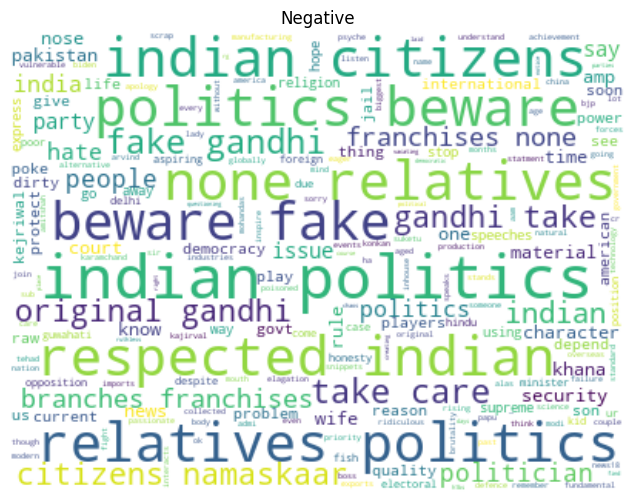

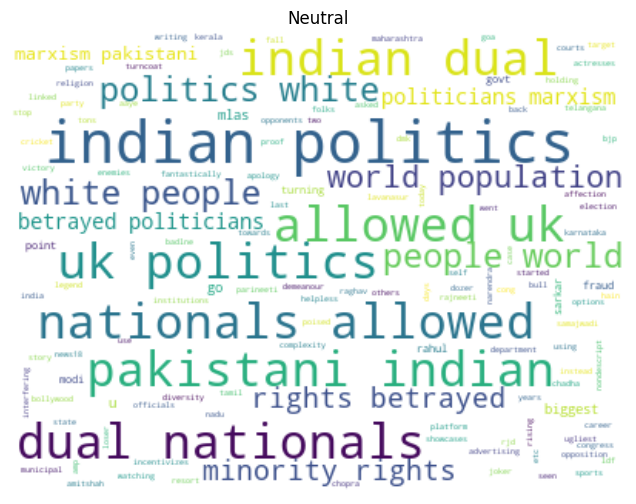

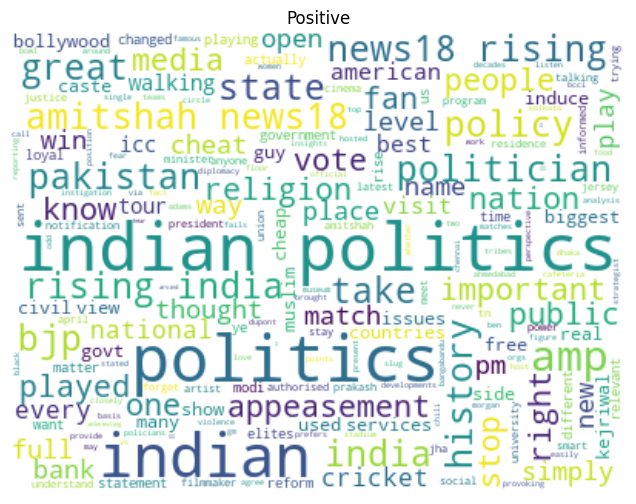

In [29]:

# Group the tweets by sentiment and concatenate them into a single string
sentiment_groups = df.groupby('Sentiment')
text_by_sentiment = {}
for sentiment, group in sentiment_groups:
    text_by_sentiment[sentiment] = ' '.join(group['Tweet'].tolist())

# Generate a wordcloud for each sentiment
for sentiment, text in text_by_sentiment.items():
    wordcloud = WordCloud(background_color='white', width=400, height=300).generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sentiment)
    plt.show()

## Question & Answer

#### what is the different *'nltk.sentiment.vader'* and *'textblob*' libraries for sentiment analysis ?
Both the nltk.sentiment.vader and textblob libraries provide tools for sentiment analysis in Python, but they differ in their approach and the features they offer.

The nltk.sentiment.vader library uses a lexicon-based approach to sentiment analysis. It assigns sentiment scores to individual words and combines them to produce an overall sentiment score for a text. The library uses a pre-defined sentiment lexicon that contains words with associated sentiment scores, and also takes into account rules that capture the context and intensity of the sentiment. The SentimentIntensityAnalyzer class in nltk.sentiment.vader provides a convenient way to perform sentiment analysis using this approach.

On the other hand, the textblob library uses a machine learning approach to sentiment analysis. It provides a pre-trained sentiment analysis model that has been trained on a large corpus of text data. The model uses a combination of machine learning techniques and natural language processing (NLP) to predict the sentiment of a text. The TextBlob class in textblob provides a simple interface for performing sentiment analysis using this approach.

#### Then which will be the better for use?
The choice between nltk.sentiment.vader and textblob for sentiment analysis depends on your specific use case and the nature of the text data you are working with.

If you are working with short and informal text data such as social media posts or product reviews, nltk.sentiment.vader might be a better choice due to its ability to handle sentiment intensifiers and contextual modifiers. The lexicon-based approach used by nltk.sentiment.vader allows it to capture nuances in sentiment that may not be captured by machine learning-based approaches like textblob.

On the other hand, if you are working with longer and more formal text data such as news articles or academic papers, textblob might be a better choice. The machine learning-based approach used by textblob allows it to learn from a large corpus of text data and generalize to new text data that it has not seen before. This makes it more suitable for handling complex and varied language use cases.

In general, it's a good idea to experiment with both libraries and see which one performs better for your specific use case.

### Thank you for taking the time to view the notebook. I would be honored if you could share any feedback, suggestions or recommendations for improvement. Your insights will be greatly appreciated. Thank you and have a great day!

<center><img src='https://media4.giphy.com/media/M9gbBd9nbDrOTu1Mqx/giphy.gif?cid=790b7611704aa2ca4e403287801480a6c753abf45f3e6242&rid=giphy.gif&ct=s' 
     height=30px width=160px /></center>